# Linear regression with multiple variables
In this part, you will implement linear regression with multiple variables to predict the prices of houses. Suppose you are selling your house and you want to know what a good market price would be. One way to do this is to ﬁrst collect information on recent houses sold and make a model of housing prices. 

### Content: 
    1. Lading Dataset 
    2. Preprocessing 
    

In [1]:
# Importing Libraries 
% matplotlib inline 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

In [2]:
data = pd.read_csv('ex1data2.txt')
data.head()

,Size,bedrooms,price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [3]:
X = data.drop(columns='price')
y = np.array(data['price'])
y = y.reshape((47, 1))
m = np.size(y)

## Pre-processing - Normalizing the data 
By looking at the values, note that house sizes are about 1000 times the number of bedrooms. When features diﬀer by orders of magnitude, ﬁrst performing feature scaling can make gradient descent converge much more quickly.

\begin{equation*}
X = \frac {X - mean}{std(x)}
\end{equation*}

In [4]:
# Scale features to be standard 
X = X - X.mean()
std = np.std(X)
X = X / std
X.head()

,Size,bedrooms
0,0.131415,-0.226093
1,-0.509641,-0.226093
2,0.507909,-0.226093
3,-0.743677,-1.554392
4,1.271071,1.102205


In [5]:
# modifying the x variable 
X = np.append(np.ones((m, 1)), X, axis=1)

In [6]:
# modifying number of iteration and learning rate 
iterations = 400 
alpha = 0.001

In [7]:
theta = np.zeros((3, 1))
theta

array([[0.],
       [0.],
       [0.]])

### Cost Function:
\begin{equation*}
 J(\theta_0, \theta_1) = \frac{1}{2m} * \sum_{k=1}^m (X * \theta - y) ^ 2  
\end{equation*}

In [8]:
def computeCost(X, y, theta):
    m = np.size(y)
    return (1/(2 * m)) * np.sum((np.dot(X, theta) - y) **2) 

### Gradient Descent 

\begin{equation*}
\theta_j = \theta_j - \alpha * \frac{1}{m} * \sum{(h_\theta(x^{(i)}) - y^{(i)}) * x_j^{(i)}}
\end{equation*}

In [17]:
def gradient_descent(X, y, theta, alpha, num_iters):
    j_hist = np.zeros(num_iters)
    
    m = np.size(y)
    for x in range(num_iters): 
        delta = (1/m) * (X.T.dot((np.dot(X, theta) - y)))
        theta = theta - alpha * delta
        j_hist[x] = computeCost(X, y, theta)
    return theta, j_hist

In [18]:
[theta, j_hist] = gradient_descent(X, y, theta, alpha, iterations)

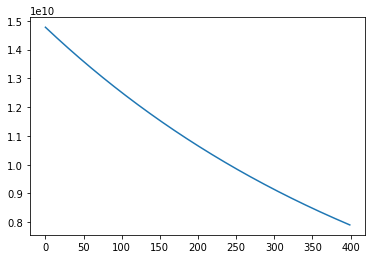

In [19]:
plt.plot(np.arange(0,400,1), j_hist)